In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime

import math
import scipy.stats
import sklearn
from sklearn import preprocessing
from sklearn import svm


In [2]:
btc_spot_df = pd.read_csv('/Users/answer/Desktop/paper/DATA/btc_spot_df.csv')
btc_futures_df = pd.read_csv('/Users/answer/Desktop/paper/DATA/btc_futures_df.csv')

# Read in train-test fold data
info = np.load('/Users/answer/Desktop/paper/DATA/info.npy', allow_pickle=True)

In [3]:
btc_spot_df

,Unnamed: 0,Unnamed: 0.1,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore,sma,ewma,mfi,rsi,price
0,0,6,27/06/2020 21:40,8966.34,8968.00,8960.09,8967.34,31.426028,1.593290e+12,281720.9799,386,21.883093,196181.86540,0,-0.000059,0.000046,-0.003442,0.500170,1.405296e-04
1,1,7,27/06/2020 21:41,8967.34,8971.38,8963.56,8971.13,24.776811,1.593290e+12,222210.1035,333,13.251009,118849.71860,0,-0.000012,0.000176,0.018727,-0.000008,4.226448e-04
2,2,8,27/06/2020 21:42,8971.13,8975.01,8967.84,8967.85,25.929236,1.593290e+12,232639.6977,452,13.615186,122158.81910,0,0.000037,-0.000012,0.650953,0.000012,-3.656173e-04
3,3,9,27/06/2020 21:43,8967.85,8968.72,8965.00,8967.43,16.565046,1.593290e+12,148543.3204,301,5.134169,46037.41095,0,0.000127,-0.000024,0.066106,-0.000037,-4.683397e-05
4,4,10,27/06/2020 21:44,8967.43,8970.00,8966.47,8970.00,21.069830,1.593290e+12,188955.1691,228,12.997024,116557.60180,0,0.000087,0.000081,0.007060,0.000058,2.865927e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46779,46779,46786,30/07/2020 12:49,10925.62,10929.43,10924.83,10928.70,21.322603,1.596110e+12,232999.3790,631,11.006401,120272.94470,0,-0.000161,-0.000018,0.692057,0.500256,2.819062e-04
46780,46780,46787,30/07/2020 12:50,10928.88,10935.00,10927.21,10934.99,29.036445,1.596110e+12,317414.8958,644,9.913961,108385.48210,0,-0.000077,0.000180,0.109736,-0.000051,5.755488e-04
46781,46781,46788,30/07/2020 12:51,10935.00,10936.47,10934.00,10935.00,50.125957,1.596110e+12,548115.1078,433,40.548959,443389.93260,0,0.000068,0.000120,0.825937,0.333646,9.144956e-07
46782,46782,46789,30/07/2020 12:52,10935.00,10938.08,10933.18,10937.34,26.610520,1.596110e+12,291004.4304,472,21.335300,233317.55420,0,0.000300,0.000151,0.155075,0.250033,2.139918e-04


In [4]:
btc_futures_df

,Unnamed: 0,Unnamed: 0.1,TIMESTAMP,OPEN,HIGH,LOW,CLOSE,VOLUME,close_time,quote_volume,trades,taker_base_volue,taker_quote_volume,ignore,sma,ewma,mfi,rsi,price
0,0,24154,27/06/2020 21:40,8981.2,8981.2,8975.9,8978.7,1124,1.593290e+12,12.519057,26,638,7.106587,0,-0.000102,-0.000026,-0.181107,-0.333386,-0.000189
1,1,24155,27/06/2020 21:41,8981.0,8986.0,8981.0,8986.0,665,1.593290e+12,7.403251,20,509,5.666938,0,0.000056,0.000265,0.615585,0.000084,0.000813
2,2,24156,27/06/2020 21:42,8986.0,8990.9,8985.5,8985.5,1192,1.593290e+12,13.260254,50,96,1.068032,0,0.000091,0.000152,0.579460,-0.000056,-0.000056
3,3,24157,27/06/2020 21:43,8983.2,8983.3,8982.0,8983.3,504,1.593290e+12,5.610781,20,293,3.261792,0,0.000236,0.000016,0.094519,-0.000091,-0.000245
4,4,24158,27/06/2020 21:44,8983.2,8984.1,8983.2,8984.1,271,1.593290e+12,3.016544,6,270,3.005412,0,0.000082,0.000041,-0.002184,0.000124,0.000089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46779,46779,71143,30/07/2020 12:49,11229.8,11230.5,11229.8,11230.4,315,1.596110e+12,2.804892,5,25,0.222620,0,-0.000249,-0.000125,774424.864016,1.001065,0.000071
46780,46780,71144,30/07/2020 12:50,11230.6,11237.8,11230.6,11237.8,169,1.596110e+12,1.504542,11,162,1.442231,0,-0.000118,0.000136,0.539988,0.500635,0.000659
46781,46781,71145,30/07/2020 12:51,11238.5,11239.2,11238.5,11239.2,114,1.596110e+12,1.014308,4,2,0.017796,0,0.000023,0.000132,0.706600,0.333702,0.000125
46782,46782,71146,30/07/2020 12:52,11239.3,11239.9,11238.2,11238.2,666,1.596110e+12,5.925712,20,168,1.494797,0,0.000203,0.000059,-0.153316,-0.000023,-0.000089


In [5]:
btc_spot_df['TICKER'] = 'SPOT'
btc_futures_df['TICKER'] = 'FUTURES'

In [28]:
def create_pl_df(df_ticker1, df_ticker2, info):

    ticker1_name = df_ticker1['TICKER']
    ticker2_name = df_ticker2['TICKER']
    
    df_test_only = pd.DataFrame()
    df_test_only_labels = pd.Series()

    for i in info:
        idx = i['test']['index']
        #print(idx)

        residuals = i['test']['residuals_transform_price']
        beta = i['train']['beta_fit_price']
        data = pd.concat([df_ticker1.loc[idx,'CLOSE'], 
                             beta * df_ticker2.loc[idx,'CLOSE'], 
                             df_ticker1.loc[idx,'price'], 
                             beta * df_ticker2.loc[idx,'price'], 
                             i['test']['residuals_transform_price'], 
                             df_ticker1.loc[idx, 'TIMESTAMP']
                            ], axis=1)

        df_test_only = df_test_only.append(data)
        df_test_only_labels = df_test_only_labels.append(i['test']['labels'])

    df_test_only['label'] = df_test_only_labels
    df_test_only.columns=['BTC', 'beta*BTC', 'BTC_return', 
                          'beta*BTC_return', 'residual', 'TIMESTAMP', 'label']
    # Find Profit of last trade given percent returns. 
    # (y-(1-deltaY)y) - (x-(1-deltaX)x)
    df_test_only['beta*BTC_gains'] = df_test_only['beta*BTC']-(1-df_test_only['beta*BTC_return'])*df_test_only['beta*BTC']
    df_test_only['BTC_gains'] = df_test_only['BTC']-(1-df_test_only['BTC_return'])*df_test_only['BTC']
    df_test_only['profit'] = df_test_only['BTC_gains'] - df_test_only['beta*BTC_gains']
    df_test_only['TIMESTAMP'] = pd.to_datetime(df_test_only.TIMESTAMP)
    print('P/L Dataframe saved as "df_residual" parameter.')
    return df_test_only

In [29]:
def param_format(params):

    parameters = ', '.join("{!s}-{!r}".format(key,val) for (key,val) in params.items())
    parameters = parameters.replace("{", "")
    parameters = parameters.replace("}", "")
    parameters = parameters.replace("'", "")
    parameters = parameters.replace(",", "_")
    parameters = parameters.replace(" ", "")
    parameters = parameters.replace(":", "")
    parameters = parameters.replace(".", "")
    parameters = parameters.strip()
    
    return parameters

In [64]:
def sharpe(data):

    daily_profit = data.groupby(by = 
                                   [data.TIMESTAMP.dt.year, 
                                    data.TIMESTAMP.dt.month, 
                                    data.TIMESTAMP.dt.day])['profit_timeline'].sum()
    
    return np.mean(daily_profit)/np.std(daily_profit) * np.sqrt(252)


def sortino(data):

    daily_profit = data.groupby(by = 
                                   [data.TIMESTAMP.dt.year, 
                                    data.TIMESTAMP.dt.month, 
                                    data.TIMESTAMP.dt.day])['profit_timeline'].sum()
    
    return np.mean(daily_profit)/np.std([pl for pl in daily_profit if pl < 0]) * np.sqrt(252)
    

def precision(pred, label):
    return (pred[np.logical_and(pred==1, label==1)].shape[0])/pred[pred==1].shape[0]


def fit(params, info):

    preds = []

    for i in info:
        b_svm = svm.SVC(**params)
        b_svm.fit(i['train']['df_scale'], i['train']['labels'])
        pred = b_svm.predict(i['test']['df_scale'])
        preds.append(pred)
        
    return np.hstack(np.array(preds))


def profit_and_loss(df_test, preds, params, window=5, threshold=0.0003, plot=True, save_dir=None):

    backtest_results = {}
    # Turn params into string for file output
    param_str = param_format(params)
    print("Finding Profit/Loss for model with parameters: %s." % param_str)
    total_profit = 0.0
    
    # Daily profit p/l
    profit_timeline = []
    # Per trade p/l
    trade_profit_timeline = []
    # Amount of minutes held per trade
    time_held_timeline = []
    # Trades held portfolio
    trades_data = []

    data = df_test.copy()
    data['label'] = preds

    for row in data.iterrows():
        cur_profit = 0.0
        profit = row[1]['profit']
        residual = row[1]['residual']
        
        # For each currently held trade in portfolio, adjust freshness and profit with each timestep. 
        for position in trades_data:
            position['fresh'] += 1
            position['profit'] += profit
            # If the residual crosses the threshold or the time runs out, unload the trade. 
            if (position['residual'] - threshold >= residual) or position['fresh'] >= window:
                cur_profit+=position['profit']
                # To keep track of average trade value. 
                trade_profit_timeline.append(position['profit'])
                time_held_timeline.append(position['fresh'])
                trades_data.remove(position)
        profit_timeline.append(cur_profit)
        total_profit+=cur_profit

        if row[1]['label']==1 and residual > 0:
            trades_data.append({'profit': 0, 'residual': residual, 'fresh': 0})
            
    # Appends daily p/l array to array for easier calculations in the future.         
    data['profit_timeline'] = profit_timeline
    
    backtest_results['total_profit'] = total_profit
    backtest_results['daily_profit_timeline'] = profit_timeline
    backtest_results['trade_profit_timeline'] = trade_profit_timeline
    backtest_results['time_held_timeline'] = time_held_timeline
    backtest_results['trades_executed'] = len(trade_profit_timeline)
    backtest_results['params'] = params
    backtest_results['precision'] = precision(data['label'], df_test['label'])
    backtest_results['mean_profit_per_trade'] = np.mean(trade_profit_timeline)
    backtest_results['sharpe'] = sharpe(data)
    backtest_results['sortino'] = sortino(data)
    
    if plot:
        # Plot Total Profit
        min_date = data.TIMESTAMP.min()
        max_date = data.TIMESTAMP.max()
        plt.figure(figsize=(12, 8))
        plt.plot(np.cumsum(profit_timeline), color='green')
        plt.xlabel('Time')
        plt.ylabel('P/L')
        plt.xlim([0, data.shape[0]])
        plt.ylim([-2000, 6000])
        plt.title('Total P/L from %s to %s \n Window=%d, threshold = %0.5f \n Model Parameters: %s' % (min_date, max_date, window, threshold, params))
        plt.grid()
        plt.tight_layout()
        plt.savefig(save_dir + 'total_pl_' + param_str +'.png')

        # Plot Time Held Histogram
        plt.figure(figsize=(12, 8))
        plt.hist(time_held_timeline, bins=5, linestyle='solid', edgecolor='black', color='red')
        ax = plt.gca()
        plt.xlabel('Histogram of Minutes held per trade')
        plt.ylabel('Frequency')
        plt.grid()
        plt.xlim([1, window])
        plt.title('Minutes held per trade \n Model Parameters: %s' % params)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
        plt.tight_layout()
        plt.savefig(save_dir + param_str +'minutes_held_hist1.png')
        
        # Plot Minutes Held vs. Profit Scatter Plot
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        plt.scatter(trade_profit_timeline, time_held_timeline)
        plt.xlabel('Profit/Loss')
        plt.ylabel('Minutes Held')
        plt.title('Minutes Held vs. Profit/Loss')
        plt.grid()
        plt.tight_layout()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
        plt.savefig(save_dir + param_str +'minutes_held_hist.png')
        
        # Average Trade Histogram
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        plt.hist(trade_profit_timeline, bins=1000)
        plt.xlabel('Profit/Loss')
        plt.ylabel('Frequency')
        plt.title('Histogram of Profit/Loss per Trade\n Average Trade: %0.4f\n Median Trade: %0.4f' % (np.mean(trade_profit_timeline), np.median(trade_profit_timeline)))
        plt.axvline(np.median(trade_profit_timeline), label='Median', linestyle='dashed')
        plt.grid()
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
        plt.tight_layout()
        plt.savefig(save_dir + param_str +'_average_trade_hist.png')
        
    return backtest_results

In [87]:
params = {'C': 100,
   'cache_size': 2000,
   'class_weight': {0: 0.1, 1: 0.9},
   'gamma': 1,
   'kernel': 'rbf'}

In [88]:
df_pl = create_pl_df(btc_spot_df, btc_futures_df, info)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


P/L Dataframe saved as "df_residual" parameter.


In [89]:
df_pl

,BTC,beta*BTC,BTC_return,beta*BTC_return,residual,TIMESTAMP,label,beta*BTC_gains,BTC_gains,profit
2000,9101.05,8863.993099,8.131591e-05,-0.000137,-0.000221,2020-06-29 10:30:00,0,-1.216369,0.740060,1.956429
2001,9103.19,8868.346255,2.351377e-04,0.000475,0.000264,2020-06-29 10:31:00,1,4.213172,2.140503,-2.072669
2002,9104.94,8871.635306,1.922403e-04,0.000359,0.000185,2020-06-29 10:32:00,1,3.182903,1.750336,-1.432567
2003,9103.11,8868.442992,-2.009898e-04,-0.000348,-0.000165,2020-06-29 10:33:00,0,-3.087032,-1.829632,1.257399
2004,9104.50,8869.313623,1.526951e-04,0.000095,-0.000050,2020-06-29 10:34:00,0,0.842303,1.390212,0.547909
...,...,...,...,...,...,...,...,...,...,...
46779,10928.70,11568.291165,2.819062e-04,0.000073,-0.000219,2020-07-30 12:49:00,0,0.848924,3.080868,2.231944
46780,10934.99,11575.913810,5.755488e-04,0.000679,0.000066,2020-07-30 12:50:00,0,7.857163,6.293620,-1.563543
46781,10935.00,11577.355932,9.144956e-07,0.000128,0.000124,2020-07-30 12:51:00,0,1.485697,0.010000,-1.475697
46782,10937.34,11576.325845,2.139918e-04,-0.000092,-0.000309,2020-07-30 12:52:00,0,-1.060985,2.340501,3.401486


In [90]:
labels = fit(params, info)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [91]:
save_dir = '/Users/answer/Desktop/paper/DATA/PLOT/BACKTEST'

Finding Profit/Loss for model with parameters: C-100_cache_size-2000_class_weight-001_109_gamma-1_kernel-rbf.


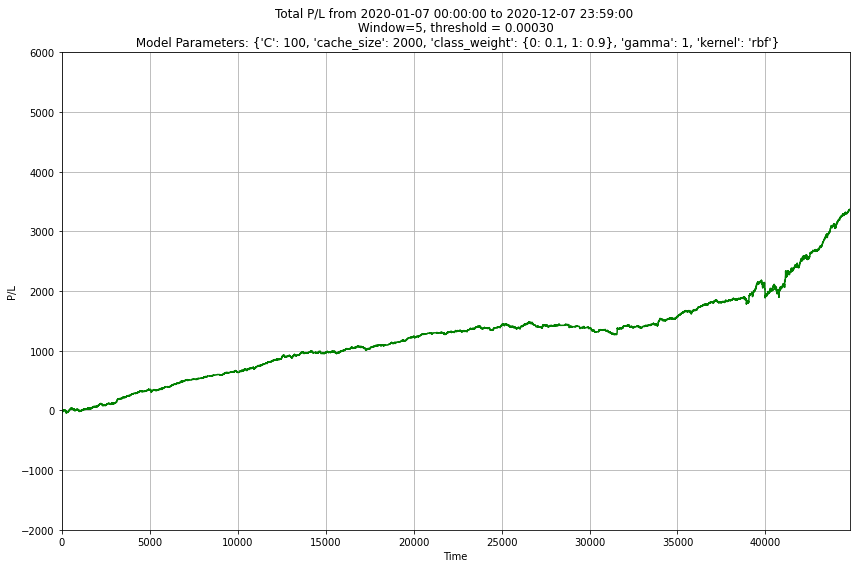

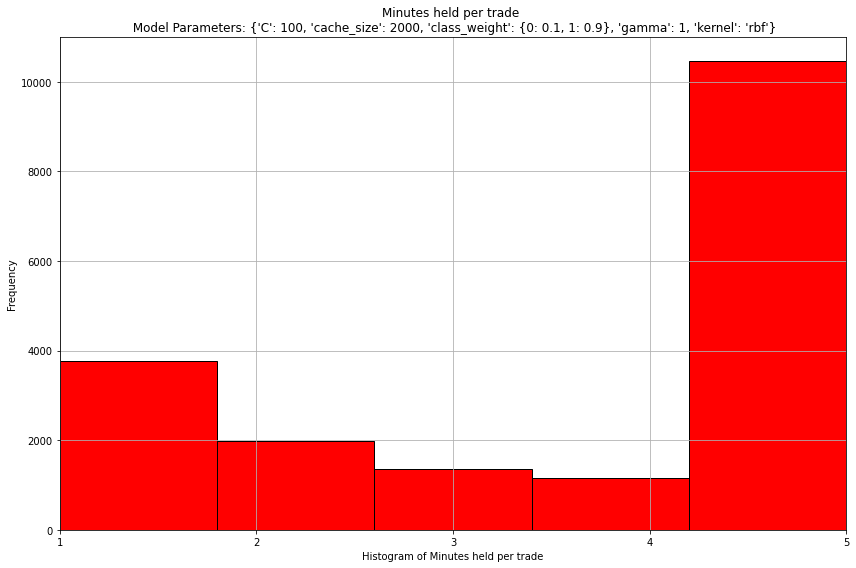

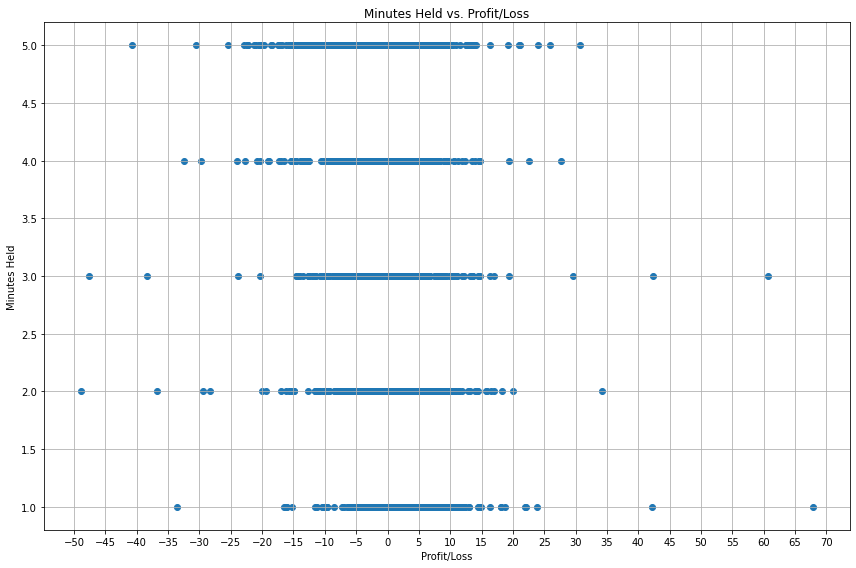

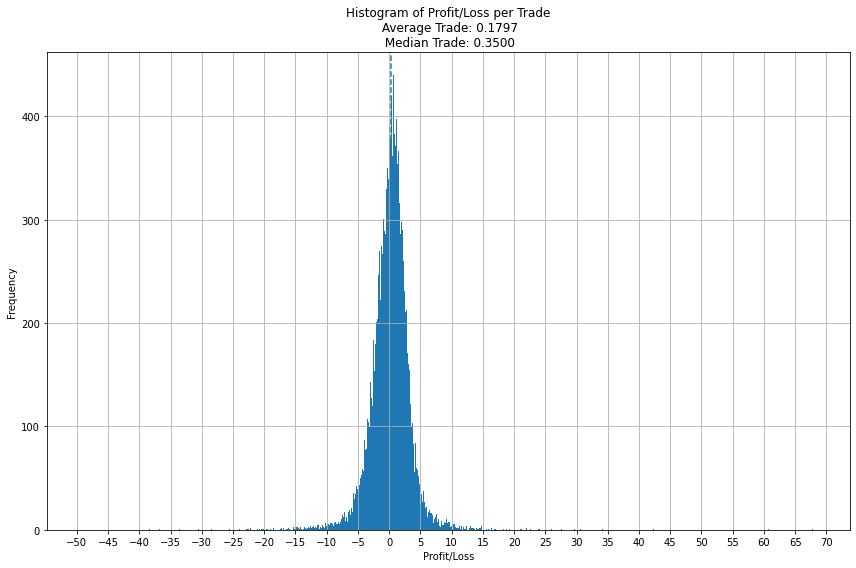

In [92]:
pl_info = profit_and_loss(df_pl, labels, params, save_dir=save_dir)

In [93]:
pl_info['precision']

0.27607345022780616

In [94]:
pl_info['sharpe']

14.662914496818056